## Définition du problème

Nous cherchons dans ce projet à reproduire l'emergence et le comportement de structure bien connus de la nature : les motifs de Turing. Ces motifs nous sont familiers, on les retrouve par exemple sur le poisson globe-géant, la fourrure d'un léopard ou encore sur certains coquillages. L'origine de ces motifs très réguliers n'est pas encore parfaitement comprise car elle repose sur des mécanismes biologique complexe : la morphogénèse, la différenciation, etc. Néanmoins, le mathématician Alan Turing proposa en 1952 dans son essai "The Chemical Basis of Morphogenesis" une première explication. Il suggère une modélisation thermochimique simple à ce phénomène. Sous ce prisme, il démontre que les motifs de Turing émergent naturellement comme solution des équations de réactions-diffusions. Nous allons tenter de résoudre ces équations pour visualiser ces motifs.

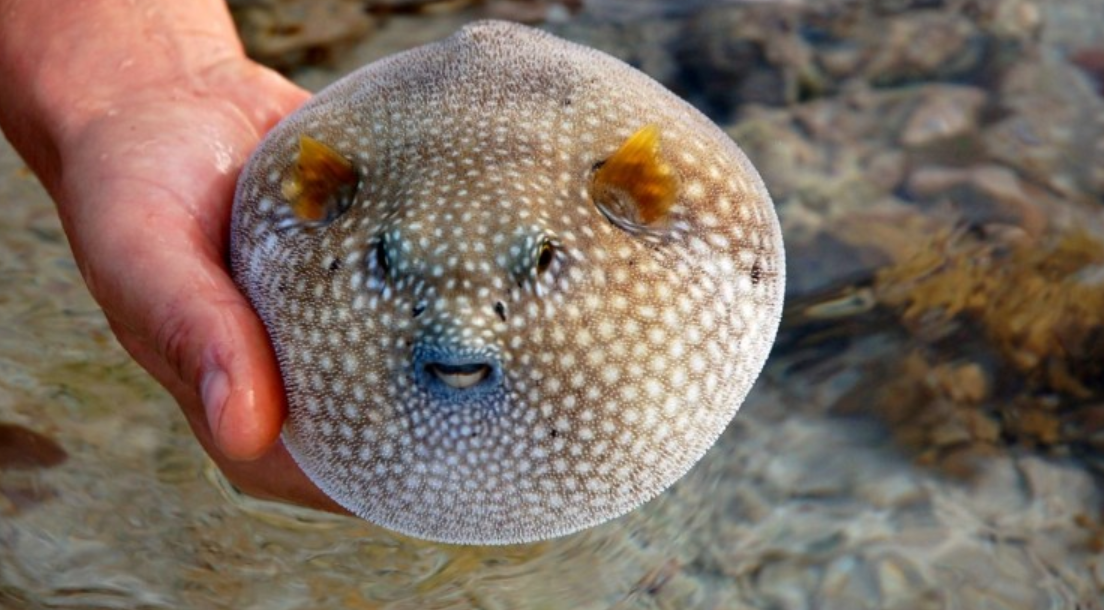

In [45]:
from IPython.display import Image
Image(filename='globe.png',width=800, height=400)

## Modélisation Théorique Succinte

En réalité, les équations de diffusion-réactions sont une grande classe d'équations aux dérivées partielles et nous n'allons pas chercher à résoudre chacun d'elle. On retrouve parmi elle le système d'équation de Gray-Scott dont nous rappelons la construction :considérons 2 espèces chimique V et U (et une troisième espèce P qui est un déchet de réaction). Les équations chimique qui régissent leurs évolution sont les suivantes :

In [42]:
%%latex
\begin{align}
U + 2V & \rightarrow 3V \\
V & \rightarrow P \\
\end{align} 

<IPython.core.display.Latex object>

De ces équations nous déduisons l'évolution dans le temps et dans l'espace des espèces U et V, ce sont les équations de Gray-Scott.

In [26]:
%%latex
\begin{align}
\frac{\partial U}{\partial t} & = D_{u}\Delta U - UV^{2} + F(1-U)\\
\frac{\partial V}{\partial t} & = D_{v}\Delta V + UV^{2} - (F+k)V\\
\end{align} 

<IPython.core.display.Latex object>

Sans rentrer dans la construction de ces équations, nous pouvons identifier 2 phénomènes couplés dans ces équations. D'une part les phénomènes de diffusion thermique reconnaissable par la présence de l'opérateur Laplacien $\Delta$ et des coefficients de diffusion $D_{u}$ et $D_{v}$. D'autre part des phénomènes de cinétique chimique caractérisés par le coefficients d'annihilation $k$ et de création $F$.

## Objectif du projet

Ces équations, de part leurs structures, n'ont pas de solution analytique. L'emploi d'une résolution numérique semble alors justifiée. Le chercheur John E. Pearson, du laboratoire national de Los Alamos, proposa dans un article qui fait désormais référence, des résolutions de ces équations pour différents paramètres $F$ et $k$. Il dresse notamment un "diagramme de phase" qui repertorie quels motifs régulier émergent en fonction de ces paramètres. Concrètement, notre objectif sera d'obtenir les mêmes résultats. Nous chercherons dans un second temps à analyser tout ces motifs pour essayer de trouver des comportements généraux caractéristiques. En d'autres termes, notre rapport se concentrera dans un premier temps sur l'implémentation de la résolution numérique et dans un second temps de l'analyse physique de nos simulations.

## Ceci est un titre de niveau 2, quand on rajoute des # la taille du titre change

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed non risus. Suspendisse lectus tortor, dignissim sit amet, adipiscing nec, ultricies sed, dolor. Cras elementum ultrices diam. Maecenas ligula massa, varius a, semper congue, euismod non, mi. Proin porttitor, orci nec nonummy molestie, enim est eleifend mi, non fermentum diam nisl sit amet erat. Duis semper. Duis arcu massa, scelerisque vitae, consequat in, pretium a, enim. Pellentesque congue. Ut in risus volutpat libero pharetra tempor. Cras vestibulum bibendum augue. Praesent egestas leo in pede. Praesent blandit odio eu enim. Pellentesque sed dui ut augue blandit sodales. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Aliquam nibh. Mauris ac mauris sed pede pellentesque fermentum. Maecenas adipiscing ante non diam sodales hendrerit.
Ut velit mauris, egestas sed, gravida nec, ornare ut, mi. Aenean ut orci vel massa suscipit pulvinar. Nulla sollicitudin. Fusce varius, ligula non tempus aliquam, nunc turpis ullamcorper nibh, in tempus sapien eros vitae ligula. Pellentesque rhoncus nunc et augue. Integer id felis. Curabitur aliquet pellentesque diam. Integer quis metus vitae elit lobortis egestas. Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Morbi vel erat non mauris convallis vehicula. Nulla et sapien. Integer tortor tellus, aliquam faucibus, convallis id, congue eu, quam. Mauris ullamcorper felis vitae erat. Proin feugiat, augue non elementum posuere, metus purus iaculis lectus, et tristique ligula justo vitae magna.

Aliquam convallis sollicitudin purus. Praesent aliquam, enim at fermentum mollis, ligula massa adipiscing nisl, ac euismod nibh nisl eu lectus. Fusce vulputate sem at sapien. Vivamus leo. Aliquam euismod libero eu enim. Nulla nec felis sed leo placerat imperdiet. Aenean suscipit nulla in justo. Suspendisse cursus rutrum augue. Nulla tincidunt tincidunt mi. Curabitur iaculis, lorem vel rhoncus faucibus, felis magna fermentum augue, et ultricies lacus lorem varius purus. Curabitur eu amet. »